# Importing data and libraries

In [3]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
PATH = '02 Data'

# Import new merged ords_prods_merge dataframe

In [3]:
# Import ords_prods_merge dataframe as 'df_ords_prods_merge'

df_ords_prods_merge = pd.read_pickle(os.path.join(PATH, 'Prepared Data', 'ords_prods_merge.pkl'))


In [18]:
df_ords_prods_merge.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,price_category_loc,Busiest day,Busiest days and Slowest days,Busiest_period_of_day,max_order,Loyalty_flag_loc,user_average_price,spending_flag,order_median,order_frequency_flag
0,2539329.0,1.0,1.0,2.0,8.0,11.11484,196.0,1.0,0.0,both,...,Mid_range product,Regularly busy,Regularly busy,Average orders,11.0,Regular customer,NaN,NaN,20.0,Regular customer
1,2398795.0,1.0,2.0,3.0,7.0,15.00000,196.0,1.0,1.0,both,...,Mid_range product,Regularly busy,Second slowest day,Average orders,11.0,Regular customer,6.367797,Low spender,20.0,Regular customer
2,473747.0,1.0,3.0,3.0,12.0,21.00000,196.0,1.0,1.0,both,...,Mid_range product,Regularly busy,Second slowest day,Average orders,11.0,Regular customer,7.515897,Low spender,20.0,Regular customer
3,2254736.0,1.0,4.0,4.0,7.0,29.00000,196.0,1.0,1.0,both,...,Mid_range product,Least busy,First slowest day,Average orders,11.0,Regular customer,8.197727,Low spender,20.0,Regular customer
4,431534.0,1.0,5.0,4.0,15.0,28.00000,196.0,1.0,1.0,both,...,Mid_range product,Least busy,First slowest day,Average orders,11.0,Regular customer,8.205556,Low spender,20.0,Regular customer


# Create visualization

In [20]:
df_ords_prods_merge.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_category_loc', 'Busiest day',
       'Busiest days and Slowest days', 'Busiest_period_of_day', 'max_order',
       'Loyalty_flag_loc', 'user_average_price', 'spending_flag',
       'order_median', 'order_frequency_flag'],
      dtype='object')

##  Creating Bar charts

<Axes: xlabel='order_day_of_week'>

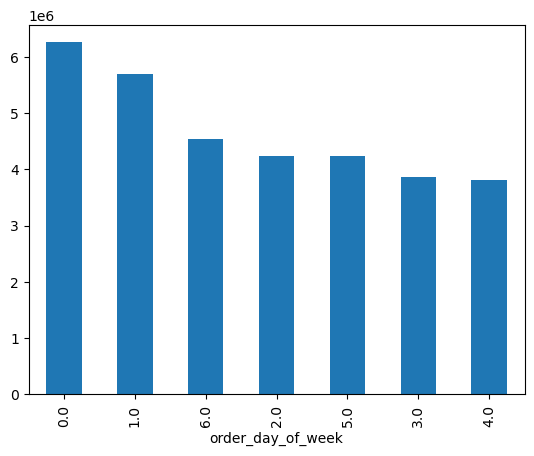

In [5]:
# create bar chart for Categorical data ('order_day_of_week')

df_ords_prods_merge['order_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='order_day_of_week'>

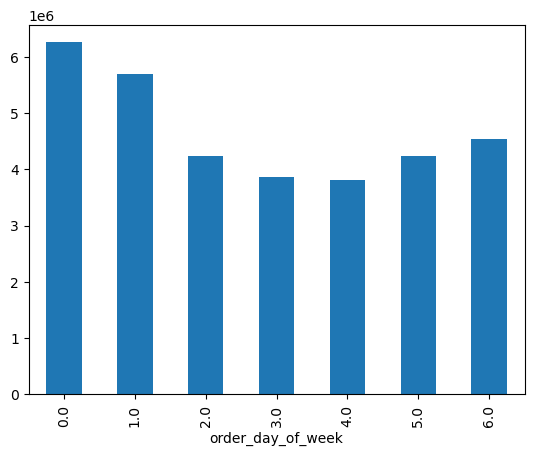

In [6]:
# sorting the index(largest to smallest)-sort_index():

df_ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar()


The sort_index() function will sort the bars in your chart according to their index order (rather than largest to smallest).This same trick can actually be used when printing frequencies, as well:




In [7]:
# This same trick can actually be used when printing frequencies, as well:
# without sorting

df_ords_prods_merge['order_day_of_week'].value_counts()


order_day_of_week
0.0    6253163
1.0    5696950
6.0    4530449
2.0    4243329
5.0    4237104
3.0    3868914
4.0    3812541
Name: count, dtype: int64

In [8]:
# with sorting

df_ords_prods_merge['order_day_of_week'].value_counts().sort_index()


order_day_of_week
0.0    6253163
1.0    5696950
2.0    4243329
3.0    3868914
4.0    3812541
5.0    4237104
6.0    4530449
Name: count, dtype: int64

<Axes: xlabel='order_day_of_week'>

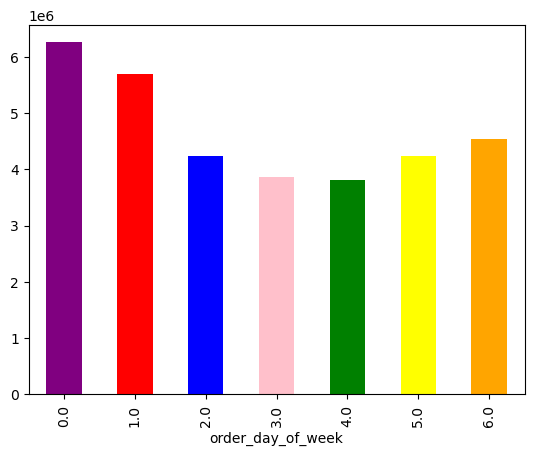

In [10]:
# adding a color argument in your plot.bar() function

df_ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple','red', 'blue','pink', 'green','yellow', 'orange'])


# Exporting Charts

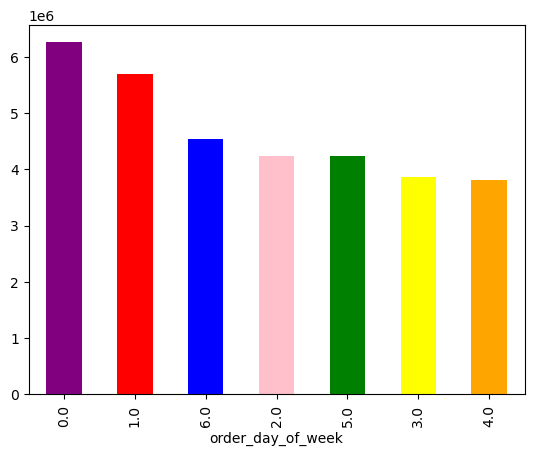

In [11]:
# save the chart 

bar = df_ords_prods_merge['order_day_of_week'].value_counts().plot.bar(color =['purple','red', 'blue','pink', 'green','yellow', 'orange'])

Now, your bar chart has been saved within the bar object, and you’ll be able to access it any time you like by calling [bar.figure]

In [13]:
# to export bar chart outside of Jupyter in the form of an image file via the figure.savefig() function:

bar.figure.savefig(os.path.join('04 Analysis','Visualization', 'bar_orders_dow.png'))


# Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

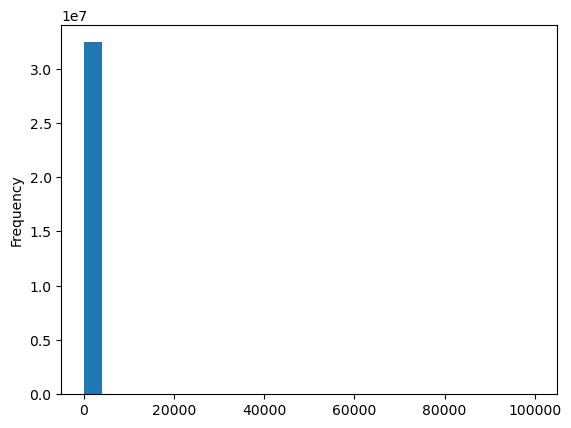

In [14]:
# creating a histogram of the “prices” colum

df_ords_prods_merge['prices'].plot.hist(bins = 25)

In [15]:
# to check the intrigrity of the histogram

df_ords_prods_merge['prices'].describe()

count    3.243422e+07
mean     1.198114e+01
std      4.954310e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

### scatterplot

<Axes: xlabel='prices', ylabel='prices'>

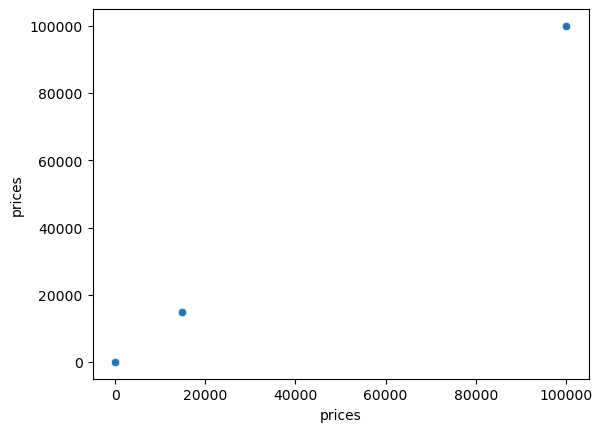

In [16]:
# creating a scatterplot of 'price' column

sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_merge)

In [17]:
# to check the outlier- if more than 100

df_ords_prods_merge.loc[df_ords_prods_merge['prices']> 100]

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,price_category_loc,Busiest day,Busiest days and Slowest days,Busiest_period_of_day,max_order,Loyalty_flag_loc,user_average_price,spending_flag,order_median,order_frequency_flag
10236554,912404.0,17.0,12.0,2.0,14.0,5.0,21553.0,5.0,0.0,both,...,High_range product,Regularly busy,Regularly busy,Average orders,41.0,Loyal customer,NaN,NaN,5.00000,Frequent customer
10236555,603376.0,17.0,22.0,6.0,16.0,4.0,21553.0,3.0,1.0,both,...,High_range product,Regularly busy,Regularly busy,Average orders,41.0,Loyal customer,NaN,NaN,5.00000,Frequent customer
10236556,3264360.0,135.0,2.0,2.0,21.0,13.0,21553.0,6.0,0.0,both,...,High_range product,Regularly busy,Regularly busy,Average orders,5.0,New customer,NaN,NaN,12.00000,Regular customer
10236557,892534.0,135.0,3.0,0.0,8.0,12.0,21553.0,3.0,1.0,both,...,High_range product,Busiest day,First busiest day,Average orders,5.0,New customer,NaN,NaN,12.00000,Regular customer
10236558,229704.0,342.0,8.0,1.0,19.0,30.0,21553.0,9.0,0.0,both,...,High_range product,Regularly busy,Second busiest day,Average orders,17.0,Regular customer,NaN,NaN,20.00000,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29401455,2249946.0,204099.0,29.0,0.0,8.0,4.0,33664.0,1.0,0.0,both,...,High_range product,Busiest day,First busiest day,Average orders,40.0,Regular customer,NaN,NaN,4.00000,Frequent customer
29401456,2363282.0,204099.0,31.0,0.0,9.0,2.0,33664.0,1.0,1.0,both,...,High_range product,Busiest day,First busiest day,Average orders,40.0,Regular customer,NaN,NaN,4.00000,Frequent customer
29401457,3181945.0,204395.0,13.0,3.0,15.0,8.0,33664.0,25.0,0.0,both,...,High_range product,Regularly busy,Second slowest day,Average orders,16.0,Regular customer,NaN,NaN,5.00000,Frequent customer
29401458,2486215.0,205227.0,7.0,3.0,20.0,4.0,33664.0,8.0,0.0,both,...,High_range product,Regularly busy,Second slowest day,Average orders,13.0,Regular customer,NaN,NaN,11.11484,Regular customer


In [21]:
# turn the outliers to nas

df_ords_prods_merge.loc[df_ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [23]:
# to check the outliers whether it is replace or not 

df_ords_prods_merge['prices'].max()



25.0

<Axes: ylabel='Frequency'>

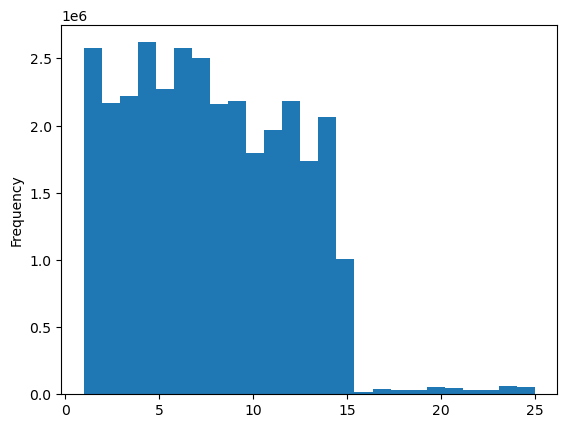

In [24]:
# after done the ad-cleaning in dataframe , check with histogram again

df_ords_prods_merge['prices'].plot.hist(bins = 25)


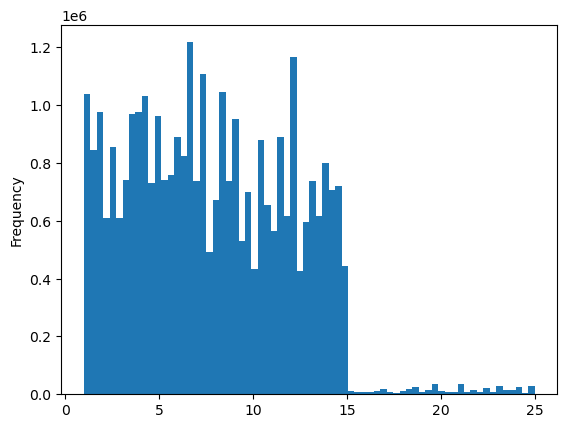

In [26]:
# To increase the level of granularity in the histogram, simply increase the number of bins to, say, 70

hist_2 = df_ords_prods_merge['prices'].plot.hist(bins = 70)

In [27]:
# export your histogram

hist_2.figure.savefig(os.path.join('04 Analysis','Visualization', 'hist_2_orders_dow.png'))

# line chart

In [5]:
# create a subset of 70/30
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_merge)) <= 0.7

NameError: name 'df_ords_prods_merge' is not defined